# Задание 3. Линейные методы классификации

1. Задание выполнить в среде Google Colaboratory, сдать в Teams данный файл.
2. Использовать выбранную и закрепленную за вами выборку данных (датасет).
3. Разбить выборку на обучающую и контрольную в пропорциях 80%-20% или 70%-30%.
4. Для метода опорных векторов (SVM) настроить параметры: *гиперпараметр регуляризации C*, *ядро*.
5. Доп. балл: найти реализацию метода стохастического градиента (SG), исследовать им свою выборку.
6. Материалы: [Машинное обучение (курс лекций, К.В. Воронцов). Метод опорных векторов](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_(%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9,_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2)#.D0.9C.D0.B5.D1.82.D0.BE.D0.B4_.D0.BE.D0.BF.D0.BE.D1.80.D0.BD.D1.8B.D1.85_.D0.B2.D0.B5.D0.BA.D1.82.D0.BE.D1.80.D0.BE.D0.B2).

## Выполнил студент

Сазонтова Мария Дмитриевна

Б9119-09.03.04прогин(1)

## Выборка данных "Glass Identification Database"

* Ссылка на выборку:  https://archive.ics.uci.edu/ml/datasets/Glass+Identification
* Описание выборки: определить тип стекла по его составу
* Количество классов: 7 (4 класса в базе данных нет)
* Количество признаков: 9 (+ID)
* Типы признаков: real
* Количество объектов: 206


## Библиотеки

In [1]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


from mlxtend.plotting import plot_decision_regions

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Метод опорных векторов (SVM)

In [3]:
#Файловый способ подключения выборки данных
from google.colab import drive
drive.mount('/content/drive')

# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', None)
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

data = pd.read_csv('drive/MyDrive/ММО/glass.csv')

X = data[["ID","Ri","Na2O","MgO","Al2O3","SiO","K2O","CaO","BaO","Fe2O3"]]
Y = data[["Type"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.40,   # Процент элементов в контрольной выборке
                                                    random_state = 1)  # Фиксация разбиения на обучение и контроль

train_df = X_train.assign(Type= Y_train)
test_df = X_test.assign(Type = Y_test)

Mounted at /content/drive


In [4]:
# Применение алгоритма классификации с базовыми значениями параметров (заменить на свои)
model = SVC(kernel="linear", C=100, random_state=0)
model.fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))

Train:  1.0
Test :  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00        13

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



### Зависимость результата от константы C на различных разбиениях

*Гиперпараметр регуляризации C* (от 0.001 до 1К).

Random_state:  0


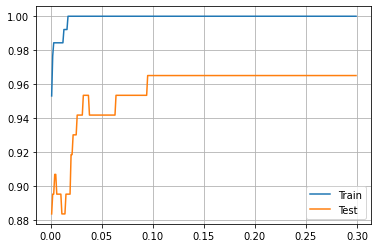

Random_state:  1


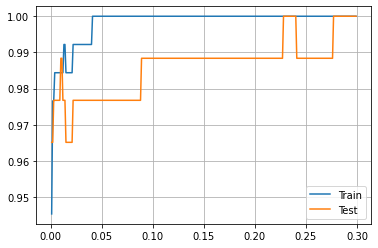

Random_state:  2


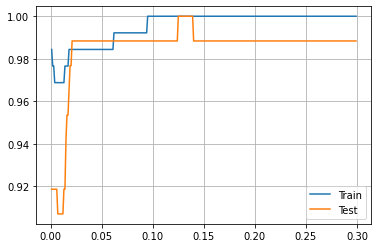

Random_state:  3


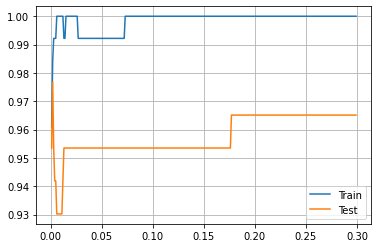

Random_state:  4


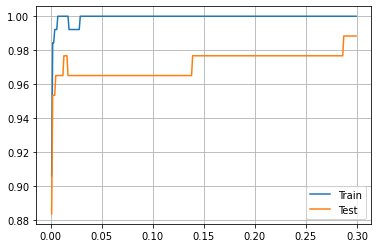

Random_state:  5


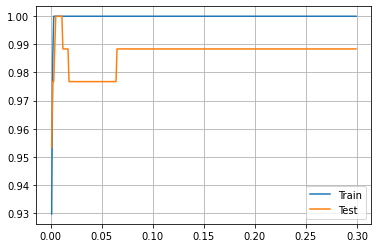

Random_state:  6


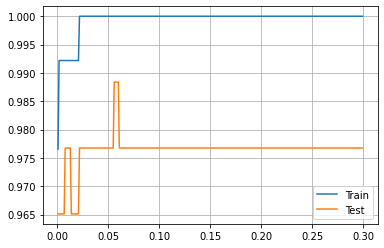

Random_state:  7


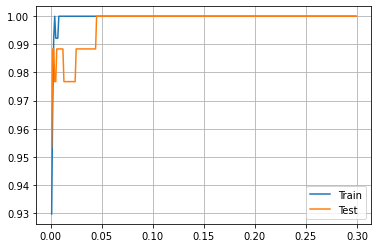

Random_state:  8


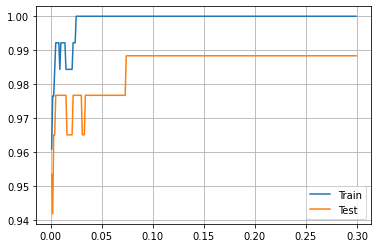

Random_state:  9


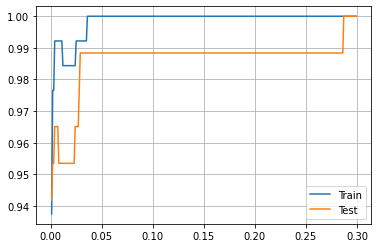

In [5]:
for r_state in range(0,10):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                        test_size = 0.40,   # Процент элементов в контрольной выборке
                                                        random_state = r_state)  # Фиксация разбиения на обучение и контроль
  models = []
  scores_train = []
  scores_test = []
  C_values = list(np.arange(0.001, 0.3, 0.001))

  for local_C in C_values:
      model = SVC(kernel="linear", C=local_C)
      model.fit(X_train, Y_train)
      scores_test.append(model.score(X_test, Y_test))
      scores_train.append(model.score(X_train, Y_train))
  print("Random_state: ", r_state)    
  plt.plot(C_values, scores_train, label='Train')
  plt.plot(C_values, scores_test, label='Test')

  plt.legend(loc='best')
  plt.grid()
  plt.show()    

Лучшее значение константы - любое в диапозоне [0.228:1000] с шагом 0.001

Качество на обучающей выборке: 100%

Качество на контрольной выборке: минимальное 96%, максимальное 100%

---



###Зависимость результата от ядра на различных разбиениях

*Ядро*: линейное (linear), ядро RBF (rbf), полиномиальное (poly), сигмоидальное (sigmoid).


Random_state:  0


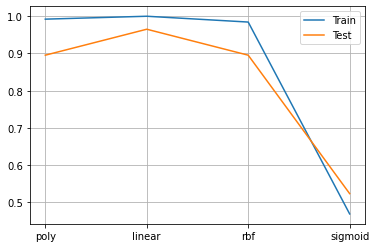

Random_state:  1


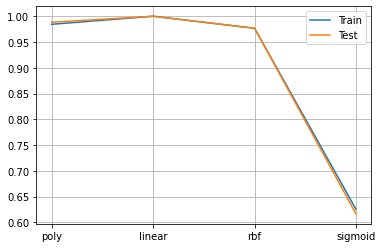

Random_state:  2


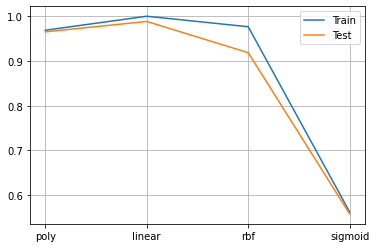

Random_state:  3


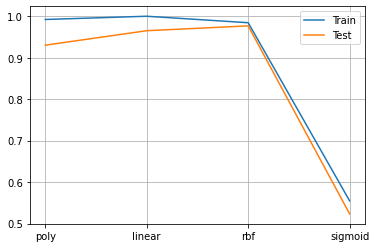

Random_state:  4


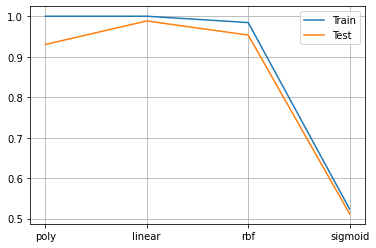

Random_state:  5


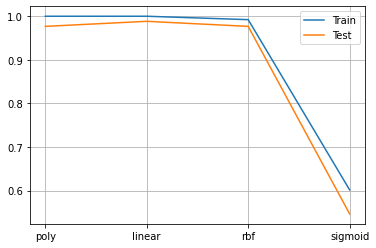

Random_state:  6


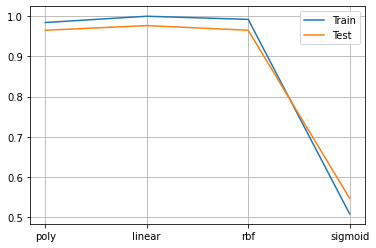

Random_state:  7


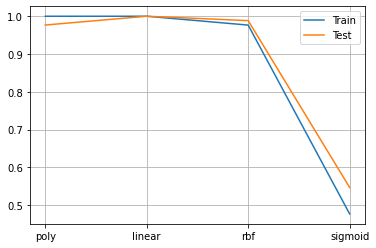

Random_state:  8


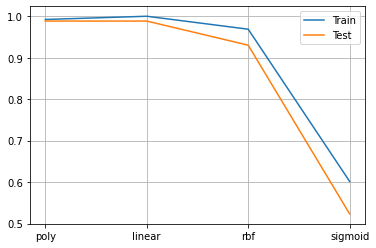

Random_state:  9


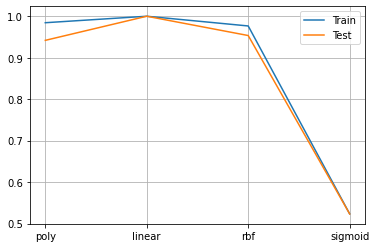

In [6]:

for r_state in range(0,10):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                      test_size = 0.40,   # Процент элементов в контрольной выборке
                                                      random_state = r_state)  # Фиксация разбиения на обучение и контроль

  models = []
  scores_train = []
  scores_test = []
  kernels = ('poly', 'linear', 'rbf', 'sigmoid')
  for local_kernel in kernels:
      model = SVC(kernel=local_kernel, C=18)
      model.fit(X_train, Y_train)
      models.append(model)
      scores_test.append(model.score(X_test, Y_test))
      scores_train.append(model.score(X_train, Y_train))
  print("Random_state: ", r_state)    
  plt.plot(kernels, scores_train, label='Train')
  plt.plot(kernels, scores_test, label='Test')

  plt.legend(loc='best')
  plt.grid()
  plt.show()

Лучшим ядром является: linear

Качество на обучающей выборке: 100%

Качество на контрольной выборке: 96% - 100%

In [ ]:
# Подбор значения random_state, ядра и константы С
kernels = ('poly', 'linear', 'rbf', 'sigmoid')
C_values = list(np.arange(0.001, 1, 0.001))
combo = [0, 0]
i=1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.40,   # Процент элементов в контрольной выборке
                                                    random_state = 1)  # Фиксация разбиения на обучение и контроль
for local_kernel in kernels:
    for local_C in C_values:
      models = []
      train_accuracy = []
      test_accuracy = []
      model = SVC(kernel=local_kernel, C=local_C, random_state=0)
      model.fit(X_train, Y_train)
      test_accuracy.append(model.score(X_test, Y_test))
      train_accuracy.append(model.score(X_train, Y_train))
      if combo[1]<=model.score(X_test, Y_test): 
         combo=[model.score(X_train, Y_train), model.score(X_test, Y_test), local_kernel, local_C]

      if model.score(X_test, Y_test)==1.00:
            print('"Лучший" результат №', i )
            i=i+1
            print('Train: ', combo[0])
            print('Test: ', combo[1])
            print('kernel: ', combo[2])
            print('C: ', combo[3], '\n')



"Лучший" результат № 1
Train:  1.0
Test:  1.0
kernel:  linear
C:  0.228 

"Лучший" результат № 2
Train:  1.0
Test:  1.0
kernel:  linear
C:  0.229 

"Лучший" результат № 3
Train:  1.0
Test:  1.0
kernel:  linear
C:  0.23 

"Лучший" результат № 4
Train:  1.0
Test:  1.0
kernel:  linear
C:  0.231 

"Лучший" результат № 5
Train:  1.0
Test:  1.0
kernel:  linear
C:  0.232 

"Лучший" результат № 6
Train:  1.0
Test:  1.0
kernel:  linear
C:  0.233 

"Лучший" результат № 7
Train:  1.0
Test:  1.0
kernel:  linear
C:  0.234 

"Лучший" результат № 8
Train:  1.0
Test:  1.0
kernel:  linear
C:  0.23500000000000001 

"Лучший" результат № 9
Train:  1.0
Test:  1.0
kernel:  linear
C:  0.23600000000000002 

"Лучший" результат № 10
Train:  1.0
Test:  1.0
kernel:  linear
C:  0.23700000000000002 

"Лучший" результат № 11
Train:  1.0
Test:  1.0
kernel:  linear
C:  0.23800000000000002 

"Лучший" результат № 12
Train:  1.0
Test:  1.0
kernel:  linear
C:  0.23900000000000002 

"Лучший" результат № 13
Train:  1.0
Test

## Метод стохастического градиента (SG)





**Задание на дополнительный балл**.

Самостоятельно найти реализацию и исследовать свою выборку данных.

Материалы: [Машинное обучение (курс лекций, К.В. Воронцов). Линейный классификатор и стохастический градиент](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_(%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9,_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2)#.D0.9B.D0.B8.D0.BD.D0.B5.D0.B9.D0.BD.D1.8B.D0.B9_.D0.BA.D0.BB.D0.B0.D1.81.D1.81.D0.B8.D1.84.D0.B8.D0.BA.D0.B0.D1.82.D0.BE.D1.80_.D0.B8_.D1.81.D1.82.D0.BE.D1.85.D0.B0.D1.81.D1.82.D0.B8.D1.87.D0.B5.D1.81.D0.BA.D0.B8.D0.B9_.D0.B3.D1.80.D0.B0.D0.B4.D0.B8.D0.B5.D0.BD.D1.82)

In [8]:
# Применение алгоритма классификации с базовыми значениями параметров (заменить на свои)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                      test_size = 0.40,   # Процент элементов в контрольной выборке
                                                      random_state = 1)  # Фиксация разбиения на обучение и контроль
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)      
                                            
model = SGDClassifier(loss="hinge", penalty="l2", max_iter=100, random_state=0).fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))



Train:  0.9609375
Test :  0.9186046511627907
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        33
           2       0.86      0.96      0.91        26
           3       1.00      0.75      0.86         8
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         2
           7       0.86      0.92      0.89        13

    accuracy                           0.92        86
   macro avg       0.87      0.81      0.83        86
weighted avg       0.91      0.92      0.91        86



Random_state:  0


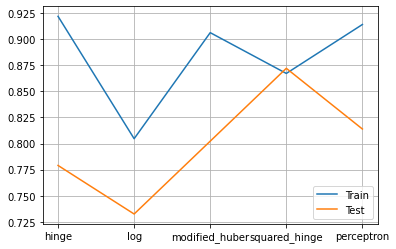

Random_state:  1


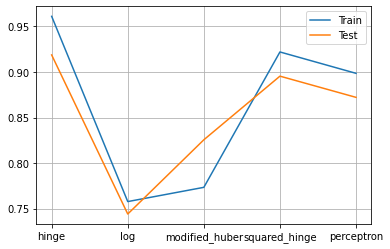

Random_state:  2


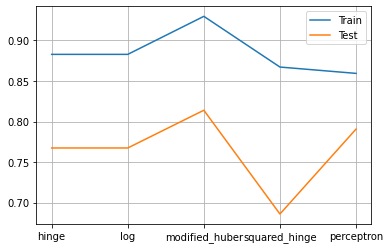

Random_state:  3


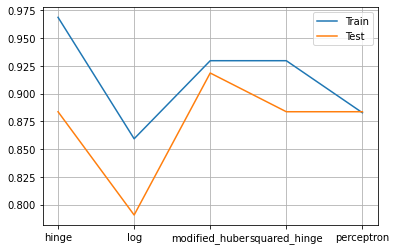

Random_state:  4


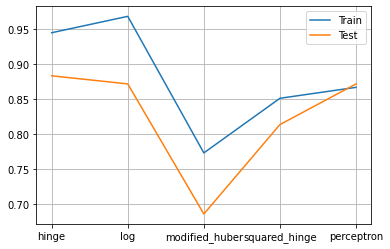

Random_state:  5


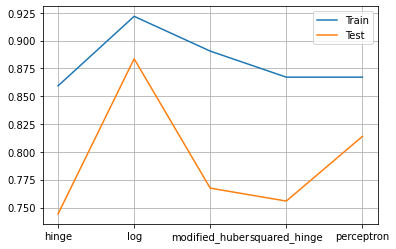

Random_state:  6


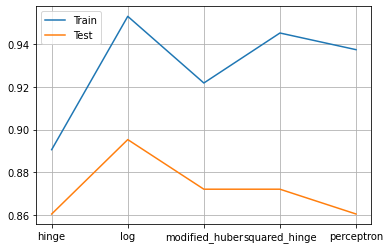

Random_state:  7


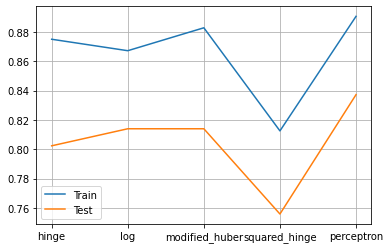

Random_state:  8


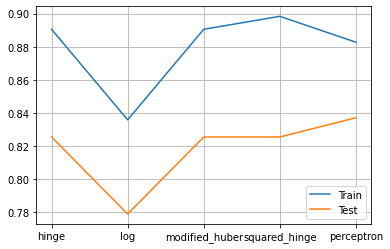

Random_state:  9


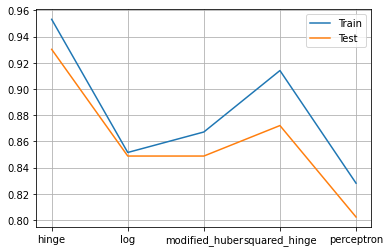

In [ ]:

for r_state in range(0,10):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                      test_size = 0.40,   # Процент элементов в контрольной выборке
                                                      random_state = r_state)  # Фиксация разбиения на обучение и контроль

  models = []
  scores_train = []
  scores_test = []
  loss=['hinge','log','modified_huber','squared_hinge','perceptron']
  for local_loss in loss:
      scaler = StandardScaler()
      scaler.fit(X_train)  
      X_train = scaler.transform(X_train)
      X_test = scaler.transform(X_test)                                           
      model = SGDClassifier(loss=local_loss, penalty="l2", max_iter=100, random_state=0)
      model.fit(X_train, Y_train)
      models.append(model)
      scores_test.append(model.score(X_test, Y_test))
      scores_train.append(model.score(X_train, Y_train))
  print("Random_state: ", r_state)    
  plt.plot(loss, scores_train, label='Train')
  plt.plot(loss, scores_test, label='Test')

  plt.legend(loc='best')
  plt.grid()
  plt.show()

Random_state:  0


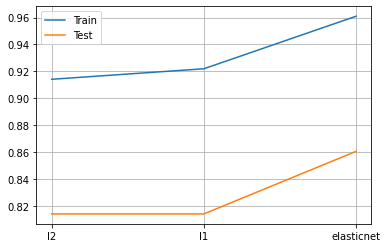

Random_state:  1


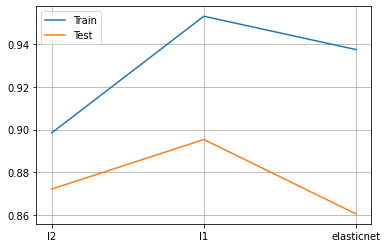

Random_state:  2


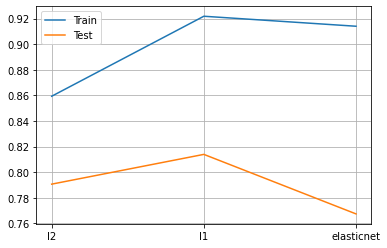

Random_state:  3


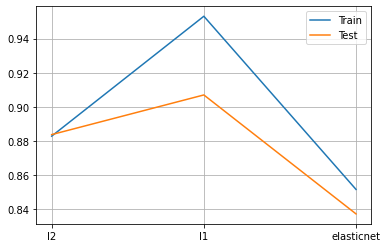

Random_state:  4


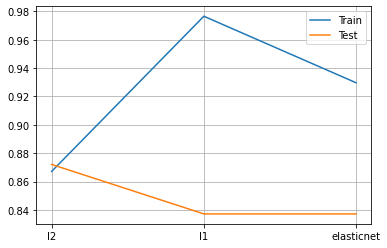

Random_state:  5


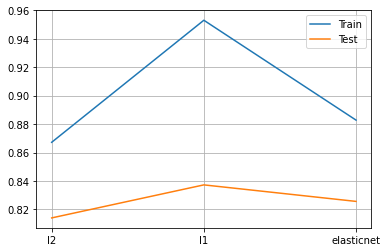

Random_state:  6


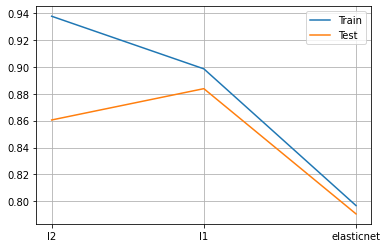

Random_state:  7


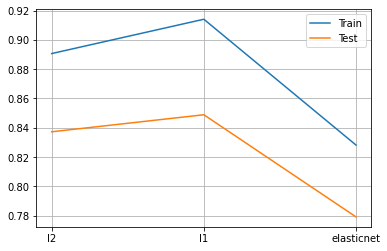

Random_state:  8


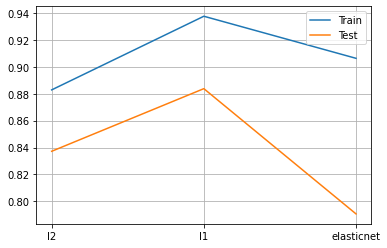

Random_state:  9


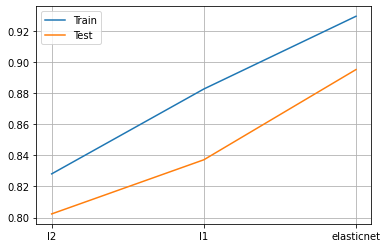

In [ ]:

for r_state in range(0,10):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                      test_size = 0.40,   # Процент элементов в контрольной выборке
                                                      random_state = r_state)  # Фиксация разбиения на обучение и контроль

  models = []
  scores_train = []
  scores_test = []
  penalty = ['l2', 'l1', 'elasticnet']
  for local_penalty in penalty:
      scaler = StandardScaler()
      scaler.fit(X_train)  
      X_train = scaler.transform(X_train)
      X_test = scaler.transform(X_test)                                              
      model = SGDClassifier(loss="perceptron", penalty=local_penalty, max_iter=100, random_state=0)
      model.fit(X_train, Y_train)
      models.append(model)
      scores_test.append(model.score(X_test, Y_test))
      scores_train.append(model.score(X_train, Y_train))
  print("Random_state: ", r_state)    
  plt.plot(penalty, scores_train, label='Train')
  plt.plot(penalty, scores_test, label='Test')

  plt.legend(loc='best')
  plt.grid()
  plt.show()

In [ ]:
loss=['hinge','log','modified_huber','squared_hinge','perceptron']
penalty = ['l2', 'l1', 'elasticnet']
combo = [0, 0]
i=1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.40,   # Процент элементов в контрольной выборке
                                                   random_state = 1)  # Фиксация разбиения на обучение и контроль
for local_loss in loss:
    for local_penalty in penalty:
      scaler = StandardScaler()
      scaler.fit(X_train)  
      X_train = scaler.transform(X_train)
      X_test = scaler.transform(X_test)      
                                            
      model = SGDClassifier(loss=local_loss, penalty=local_penalty, max_iter=100, random_state=0)
      model.fit(X_train, Y_train)
      if combo[1]<=model.score(X_test, Y_test): 
        combo=[model.score(X_train, Y_train), model.score(X_test, Y_test), local_loss, local_penalty]
        print('Train: ', combo[0])
        print('Test: ', combo[1])
        print('local_loss: ', combo[2])
        print('local_penalty: ', combo[3], '\n')
      
    



Train:  0.9609375
Test:  0.9186046511627907
local_loss:  hinge
local_penalty:  l2 

Train:  0.8671875
Test:  0.9186046511627907
local_loss:  squared_hinge
local_penalty:  l1 



---


# Заключение

## 1. Метод опорных векторов (SVM)

* Лучшее значение константы - любое в диапозоне [0.228:1000]
* Лучшим ядром является <b>linear</b>
* Качество на обучающей выборке: 100%
* Качество на контрольной выборке: 100%

## 2. Метод стохастического градиента (SG)

* Лучшим термином регуляризации является - l2 
* Лучшей функцией потерь является <b>hinge</b>
* Качество на обучающей выборке: 96%
* Качество на контрольной выборке: 92%

## 3. Вывод

Лучший результат продемонстрировал метод опорных векторов.
